<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">University of Memphis</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Center for Earthquake Research and Information</p>
<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 24px; margin: 5px 0;">Homework 4</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Introduction to Global Geophysics</p>
<p style="color:#C70039; text-align:center; font-weight: bold; margin: 2px 0;">Susana Delgado Andino</p>


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 5. a)

<p>Tabulate the Gauss coefficients for the dipole and quadrupole components of the geomagnetic field from the IGRF model.</p>

In [2]:
import pandas as pd

# File path
file_path = "C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/IGRF14coeffs.xlsx"

# Load the file without specifying a header
df = pd.read_excel(file_path, header=None)

# Set the correct row as the column header
df.columns = df.iloc[3]  
df = df[2:].reset_index(drop=True)  # Remove previous rows and reset the index

# Select only the required columns
columns_to_keep = ["g/h", "n", "m", 2025]
df_filtered = df[columns_to_keep]

# Rename the "2025" column to "Value (nT)"
df_filtered = df_filtered.rename(columns={2025: "Value (nT)"})

# Filter only the coefficients for n=1 (dipole) and n=2 (quadrupole)
df_filtered = df_filtered[(df_filtered["n"] == 1) | (df_filtered["n"] == 2)]

# Save the filtered data to a CSV file
output_file = "C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/gauss_coefficients_igrf.csv"
df_filtered.to_csv(output_file, index=False)

print(f"The Gauss coefficients have been saved to: {output_file}")
print("\nFiltered Gauss Coefficients:")
print(df_filtered.to_string(index=False))


The Gauss coefficients have been saved to: C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/gauss_coefficients_igrf.csv

Filtered Gauss Coefficients:
g/h n m Value (nT)
  g 1 0     -29350
  g 1 1    -1410.3
  h 1 1     4545.5
  g 2 0    -2556.2
  g 2 1     2950.9
  h 2 1    -3133.6
  g 2 2     1648.7
  h 2 2     -814.2


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 5. b) and c)

<p>b) Calculate the root mean square intensity of the dipole component of the field at the Earth’s surface. The mean squared value, Rn, of the intensityof the geomagnetic field at the Earth’s surface due to the component of degreen is given by</p>

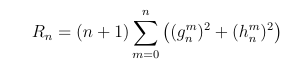

<p>c) Calculate the corresponding intensity of the quadrupole component and express it as a percentage of the dipole field intensity.</p>

In [3]:
import pandas as pd
import numpy as np

# Load the filtered Gauss coefficients file
file_path = "C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/gauss_coefficients_igrf.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Extract the coefficients for n=1 (dipole)
df_dipole = df[df["n"] == 1]

# Separate g and h coefficients
g_coeffs_dipole = df_dipole[df_dipole["g/h"] == "g"]["Value (nT)"].values
h_coeffs_dipole = df_dipole[df_dipole["g/h"] == "h"]["Value (nT)"].values

# Compute the RMS intensity of the dipole component
R_1 = 2 * (np.sum(g_coeffs_dipole ** 2) + np.sum(h_coeffs_dipole ** 2))  # (n+1) = 2 for n = 1
R_1_rms = np.sqrt(R_1)

# Print the dipole result
print(f"The R_1 intensity of the dipole component (R_1) is: {R_1:.2f} nT²")
print(f"The RMS intensity of the dipole component (R_1) is: {R_1_rms:.2f} nT")


# Extract the coefficients for n=2 (quadrupole)
df_quadrupole = df[df["n"] == 2]

# Separate g and h coefficients
g_coeffs_quad = df_quadrupole[df_quadrupole["g/h"] == "g"]["Value (nT)"].values
h_coeffs_quad = df_quadrupole[df_quadrupole["g/h"] == "h"]["Value (nT)"].values

# Compute the RMS intensity of the quadrupole component
R_2 = 3 * (np.sum(g_coeffs_quad ** 2) + np.sum(h_coeffs_quad ** 2))  # (n+1) = 3 for n = 2
R_2_rms = np.sqrt(R_2)

# Quadrupole intensity as a percentage of the dipole intensity
quadrupole_percentage = (R_2 / R_1) * 100

# Print the quadrupole results
print(f"The R_2 intensity of the quadrupole component (R_2) is: {R_2:.2f} nT²")
print(f"The RMS intensity of the quadrupole component (R_2) is: {R_2_rms:.2f} nT")
print(f"The quadrupole intensity is {quadrupole_percentage:.2f}% of the dipole intensity.")

The R_1 intensity of the dipole component (R_1) is: 1768146032.68 nT²
The RMS intensity of the dipole component (R_1) is: 42049.33 nT
The R_2 intensity of the quadrupole component (R_2) is: 85327654.62 nT²
The RMS intensity of the quadrupole component (R_2) is: 9237.30 nT
The quadrupole intensity is 4.83% of the dipole intensity.


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 5. d) 

<p>Plot the geomagnetic potential represented by these coefficients on the surface of the spherical Earth. You can modify the Python code for plotting gravity anomalies. The Schimid(semi- orpartially)normalized associated Legendre polynomials(P^m_n(cosθ))are given as follows:</p>

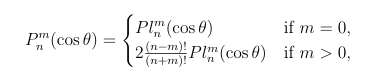

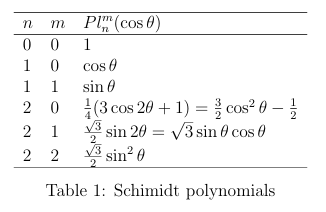

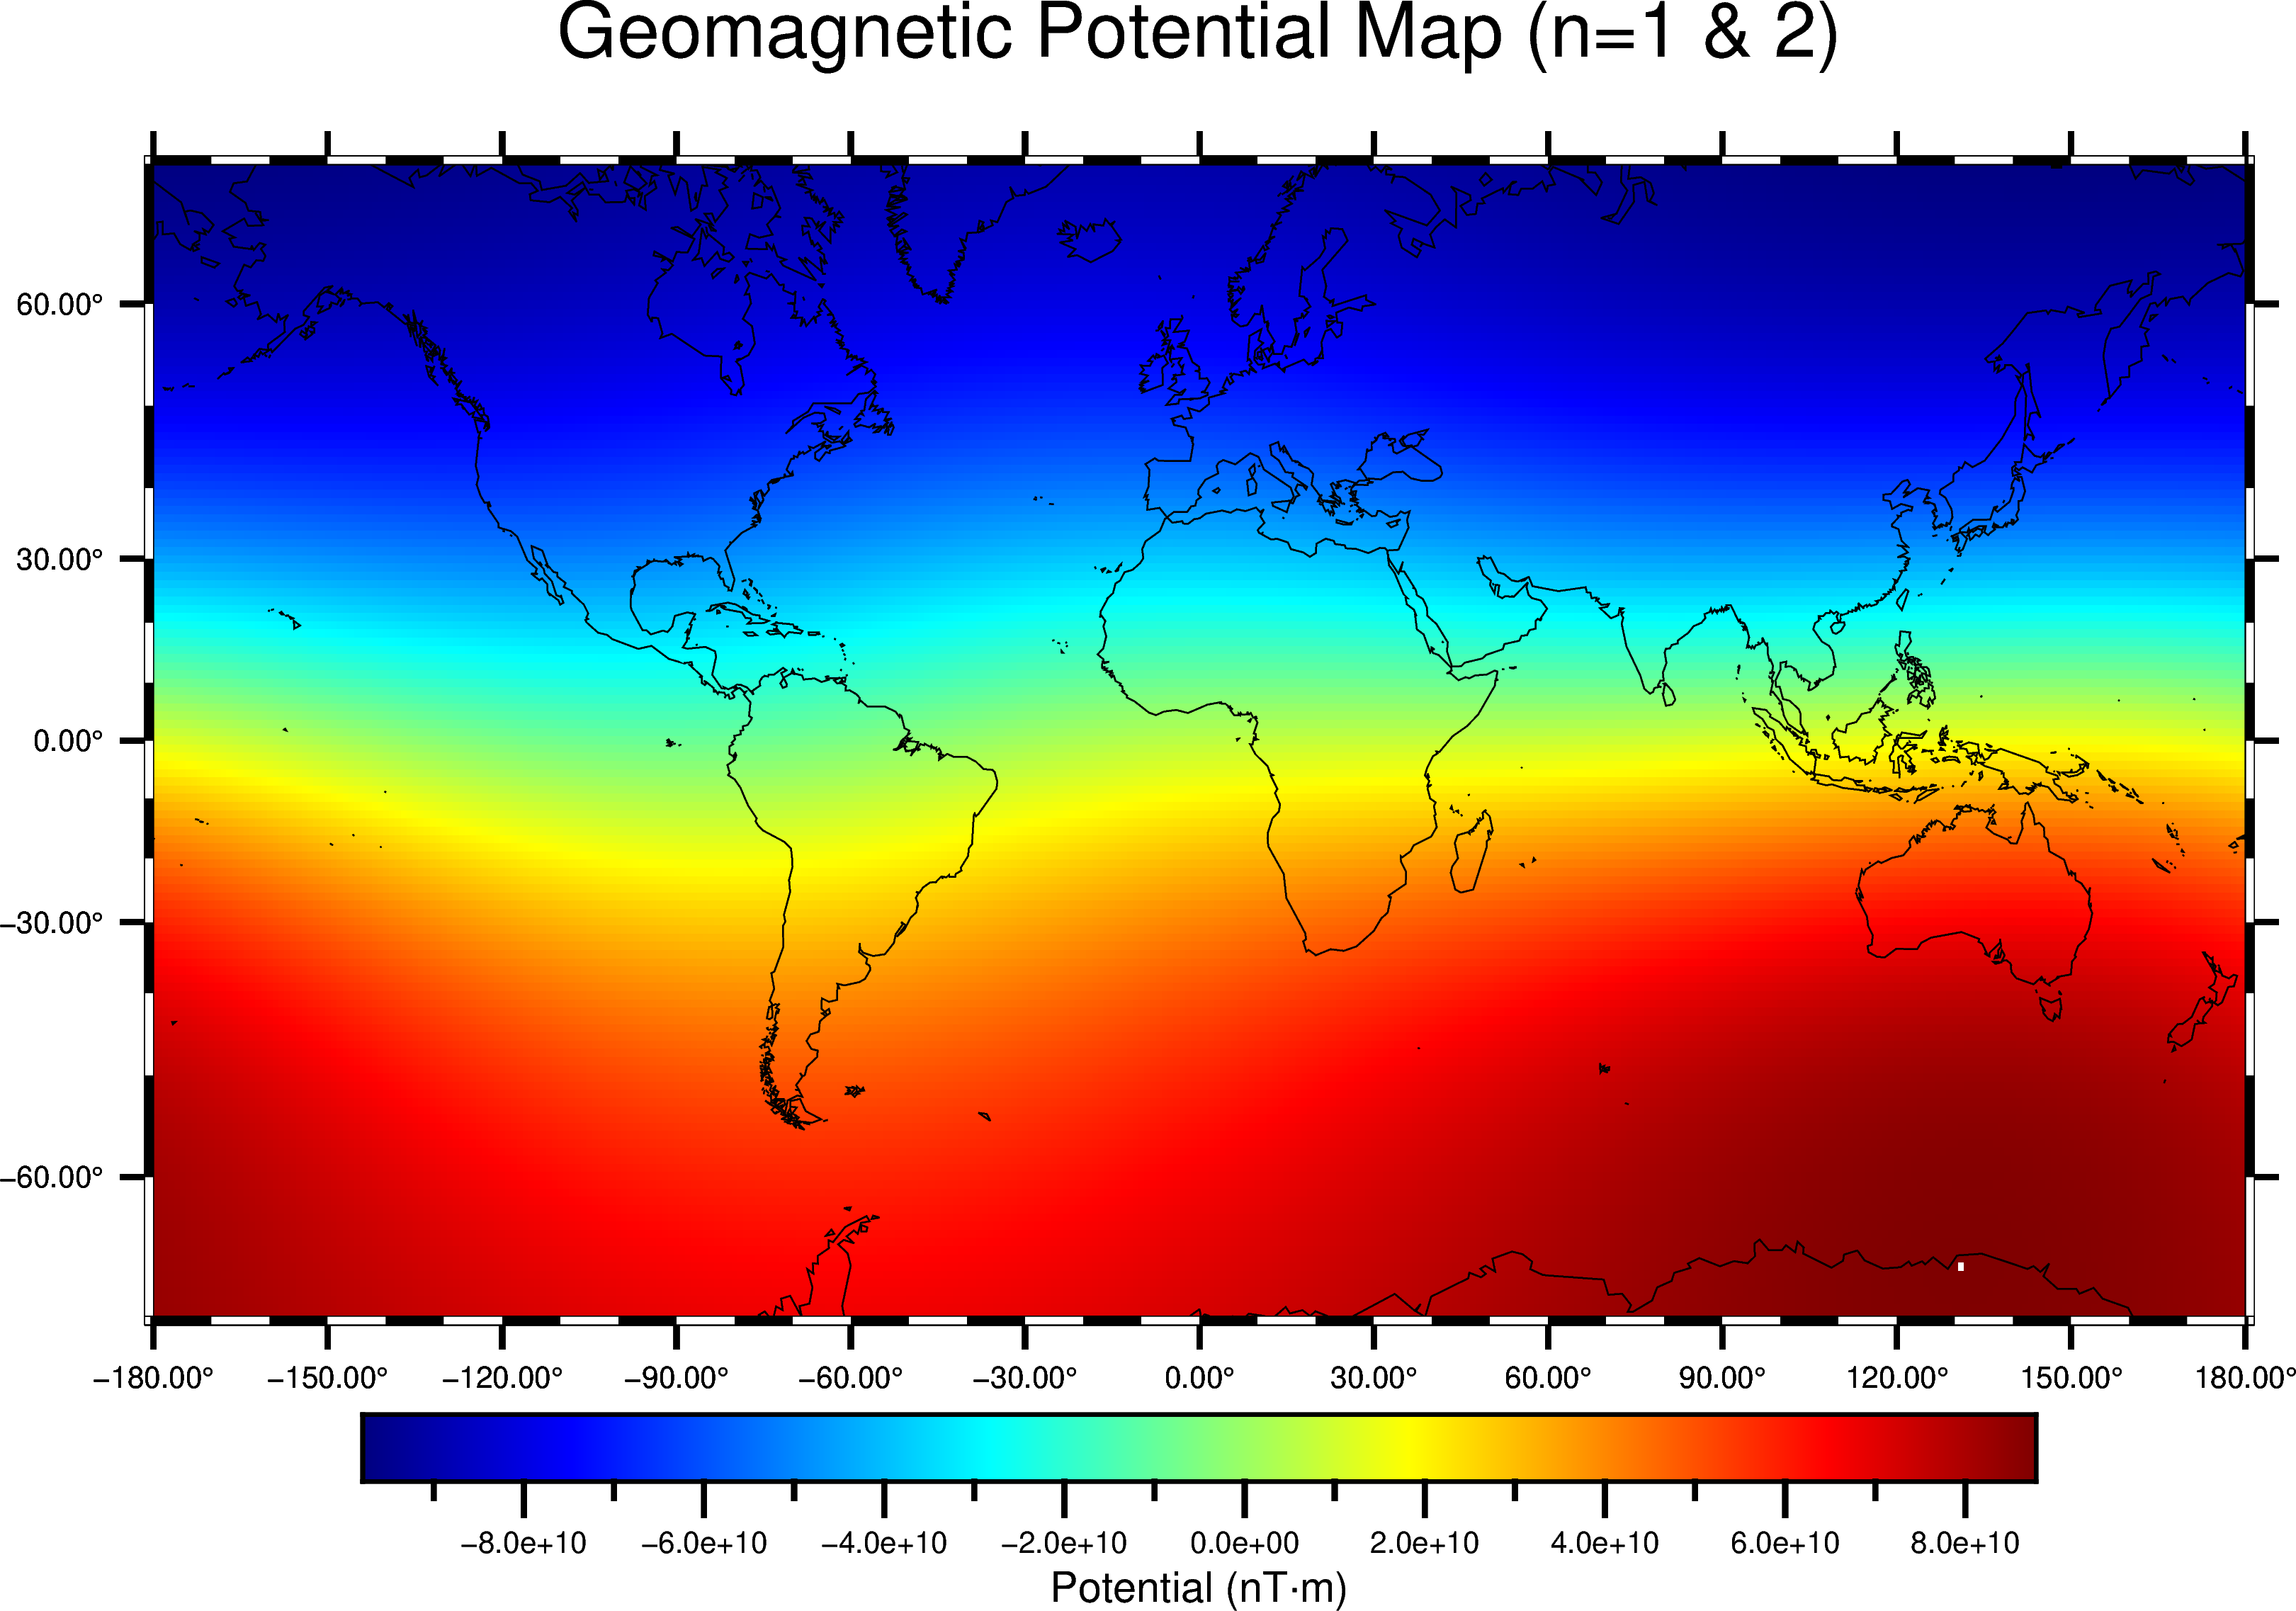

In [4]:
import pandas as pd
import numpy as np
import scipy.special as sp
import pygmt

# Load the CSV file
file_path = "C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/gauss_coefficients_igrf.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

gauss_coeffs = {}
for _, row in df.iterrows():
    key = (int(row["n"]), int(row["m"]), row["g/h"])
    gauss_coeffs[key] = row["Value (nT)"]

# Grid of latitudes and longitudes
latitudes = np.linspace(-70, 70, 180)
longitudes = np.linspace(-180, 180, 360)

# Convert latitudes to colatitudes (theta = 90° - latitude) and longitudes to radians
theta = np.radians(90 - latitudes[:, np.newaxis])  # shape (180, 1)
phi = np.radians(longitudes)                       # length 360

# Initialize the geomagnetic potential matrix
V = np.zeros((len(latitudes), len(longitudes)))

# Compute the geomagnetic potential for n=1 and n=2 using spherical harmonics
for n in range(1, 3):
    for m in range(n + 1):
        # sph_harm (m, n, phi, theta)
        Ynm = sp.sph_harm(m, n, phi, theta)
        g = gauss_coeffs.get((n, m, 'g'), 0)
        h = gauss_coeffs.get((n, m, 'h'), 0)
        term = np.real(Ynm) * g + np.imag(Ynm) * h
        V += term

# Multiply by Earth's radius to get the potential at the surface (r = R)
R = 6378137.0  # Mean Earth radius in meters
V = R * V

# Shift the grid
V_corrected = np.roll(V, shift=180, axis=1)

# Prepare data columns (x, y, z) for blockmean
data = np.column_stack((
    np.tile(longitudes, len(latitudes)),
    np.repeat(latitudes, len(longitudes)),
    V_corrected.ravel()
))

# Average data into 1-degree blocks
block = pygmt.blockmean(data=data, region=[-180, 180, -70, 70], spacing="1d")

# Create an interpolated grid from the blockmean data
grid = pygmt.surface(data=block, spacing="1d", region=[-180, 180, -70, 70])

# Plot the map 
fig = pygmt.Figure()

# Configuration
pygmt.config(FORMAT_FLOAT_MAP="%2.1e")
pygmt.makecpt(cmap="jet", series=[float(V_corrected.min()), float(V_corrected.max())])
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(MAP_ANNOT_OFFSET="0.2c")
pygmt.config(MAP_TICK_LENGTH="0.4c")
pygmt.config(MAP_TICK_PEN="0.07c")
pygmt.config(FONT_TITLE="26p,Helvetica,black")
projection = "M25c"
region_plot = [-180, 180, -70, 70]

# Basemap and grid
fig.basemap(projection=projection, region=region_plot, frame=True)
fig.grdimage(
    grid=grid,
    projection=projection,
    region=region_plot,
    cmap=True,
    frame=["af", 'WSne+t"Geomagnetic Potential Map (n=1 & 2)"']
)

# Coastlines
fig.coast(shorelines="1/0.5p", resolution="c")

# Color bar
fig.colorbar(frame='af+l"Potential (nT·m)"')

# Show
fig.show()


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 5. e) 

<p>Find the geomagnetic dipole field vector at Memphis using the IGRF14 model. Make sure to include the whole procedure you employ in your answer.</p>

In [11]:
import numpy as np
import pandas as pd

# Load CSV file
file_path = "C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/HW4/gauss_coefficients_igrf.csv"
df = pd.read_csv(file_path)

# Memphis coordinates
lat = 35.12  # Latitude in degrees
lon = -89.93  # Longitude in degrees

# Earth's radius in km
R_E = 6371.2  # km

# Convert latitude to colatitude (theta = 90° - latitude)
theta_rad = np.radians(90 - lat)
lon_rad = np.radians(lon)

# Extract Gauss coefficients for the dipole (n=1, m=0,1)
g10 = df[(df['n'] == 1) & (df['m'] == 0) & (df['g/h'] == 'g')]['Value (nT)'].values[0]
g11 = df[(df['n'] == 1) & (df['m'] == 1) & (df['g/h'] == 'g')]['Value (nT)'].values[0]
h11 = df[(df['n'] == 1) & (df['m'] == 1) & (df['g/h'] == 'h')]['Value (nT)'].values[0]

# Compute the dipole magnetic field components in spherical coordinates
Br = -2 * (g10 * np.cos(theta_rad) + g11 * np.cos(lon_rad) * np.sin(theta_rad) + h11 * np.sin(lon_rad) * np.sin(theta_rad))
Btheta = -(-g10 * np.sin(theta_rad) + g11 * np.cos(lon_rad) * np.cos(theta_rad) + h11 * np.sin(lon_rad) * np.cos(theta_rad))
Bphi = g11 * np.sin(lon_rad) - h11 * np.cos(lon_rad)

# Convert to geographic coordinates
Bn = - Btheta  # North component
Be = Bphi  # East component
Bv = -Br  # Vertical component (positive upward)

# Total field intensity
B_total = np.sqrt(Bn**2 + Be**2 + Bv**2)

# Print results
print("Geomagnetic Dipole Field Components at Memphis (IGRF 2025)")
print(f"(Btheta): {Btheta:.2f} nT")
print(f"(Bphi): {Bphi:.2f} nT")
print(f"(Br): {Br:.2f} nT")

print(f"North Component (Bn): {Bn:.2f} nT")
print(f"East Component (Be): {Be:.2f} nT")
print(f"Vertical Component (Bv): {Bv:.2f} nT (positive upward)")
print(f"Total Magnetic Field Intensity: {B_total:.2f} nT")

Geomagnetic Dipole Field Components at Memphis (IGRF 2025)
(Btheta): -21390.83 nT
(Bphi): 1404.75 nT
(Br): 41208.36 nT
North Component (Bn): 21390.83 nT
East Component (Be): 1404.75 nT
Vertical Component (Bv): -41208.36 nT (positive upward)
Total Magnetic Field Intensity: 46450.72 nT


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 6 

<p>Modify the Java Script code on https://www.khanacademy.org/science/physics/discoveries/magnetic-fields/pi/magnet-and-iron-filings to visualize the magnetic field lines from two bar magnets.</p>

https://www.khanacademy.org/computer-programming/spin-off-of-two-magnet-and-iron-filings/5714557813243904